# Análise de Gols dos Atletas do Liverpool FC

Neste notebook realizo uma análise de gols dos atletas do Liverpool FC, extraindo os dados do site fbref, tratando e manipulando tais dados e criando visualizações que facilitando a extração de insights.

In [1]:
# Começando apenas com o import de pandas
# Foco ainda não era visualização

import pandas as pd

### Webscraping

Eu poderia ter inspecionado a página já buscando a tabela específica, mas assim eu consigo manipular diretamente pelo Colab, o que me da opções também de utilizar outras tabelas da página.

In [2]:
#Webscraping simples de um html

url = "https://fbref.com/en/squads/822bd0ba/2023-2024/Liverpool-Stats"
tables = pd.read_html(url)

In [3]:
tables

[        Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                     Player             Nation                Pos   
 0          Virgil van Dijk             nl NED                 DF   
 1                Luis Díaz             co COL                 FW   
 2      Alexis Mac Allister             ar ARG                 MF   
 3            Mohamed Salah             eg EGY                 FW   
 4                  Alisson             br BRA                 GK   
 5   Trent Alexander-Arnold            eng ENG                 DF   
 6       Dominik Szoboszlai             hu HUN                 MF   
 7             Darwin Núñez             uy URU                 FW   
 8              Wataru Endo             jp JPN                 MF   
 9         Andrew Robertson            sct SCO                 DF   
 10               Joe Gomez            eng ENG                 DF   
 11              Cody Gakpo             nl NED              FW,MF   
 12         Ibrahima Konaté       

# Utilizando Loop FOR e Enumerate

Fazemos isso para identificar quantas tabelas temos e qual queremos utilizar.

O "enumerate" é uma função embutida Python que nos permite iterar sobre uma sequência enquanto acompanhamos o índice de cada elemento.

In [4]:
# Serve para explorar e escolher a tabela certa, inspecionando rapidamente as colunas antes de decidir qual trabalhar/analisar.
# O enumerate é uma função embutida do Python que permite, ao percorrer um objeto iterável (como uma lista), obter o índice (posição) e o valor ao mesmo tempo em cada iteração do loop.

for i, table in enumerate(tables):
    print(f"Tabela {i}: {table.columns.values}")

Tabela 0: [('Unnamed: 0_level_0', 'Player') ('Unnamed: 1_level_0', 'Nation')
 ('Unnamed: 2_level_0', 'Pos') ('Unnamed: 3_level_0', 'Age')
 ('Unnamed: 4_level_0', 'MP') ('Playing Time', 'Starts')
 ('Playing Time', 'Min') ('Playing Time', '90s') ('Performance', 'Gls')
 ('Performance', 'Ast') ('Performance', 'G+A') ('Performance', 'G-PK')
 ('Performance', 'PK') ('Performance', 'PKatt') ('Performance', 'CrdY')
 ('Performance', 'CrdR') ('Expected', 'xG') ('Expected', 'npxG')
 ('Expected', 'xAG') ('Expected', 'npxG+xAG') ('Progression', 'PrgC')
 ('Progression', 'PrgP') ('Progression', 'PrgR') ('Per 90 Minutes', 'Gls')
 ('Per 90 Minutes', 'Ast') ('Per 90 Minutes', 'G+A')
 ('Per 90 Minutes', 'G-PK') ('Per 90 Minutes', 'G+A-PK')
 ('Per 90 Minutes', 'xG') ('Per 90 Minutes', 'xAG')
 ('Per 90 Minutes', 'xG+xAG') ('Per 90 Minutes', 'npxG')
 ('Per 90 Minutes', 'npxG+xAG') ('Unnamed: 33_level_0', 'Matches')]
Tabela 1: ['Date' 'Time' 'Comp' 'Round' 'Day' 'Venue' 'Result' 'GF' 'GA' 'Opponent'
 'xG' 'xG

## Já Sabendo Qual Tabela Utilizar

Criamos um df com a tabela e checamos os 5 primeiros elementos.

Note que os títulos estão estranhos.

In [5]:
df = tables[0]
print(df.head())

    Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Player             Nation                Pos   
0      Virgil van Dijk             nl NED                 DF   
1            Luis Díaz             co COL                 FW   
2  Alexis Mac Allister             ar ARG                 MF   
3        Mohamed Salah             eg EGY                 FW   
4              Alisson             br BRA                 GK   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Playing Time                \
                 Age                 MP       Starts     Min   90s   
0               32.0                 36           36  3177.0  35.3   
1               26.0                 37           32  2629.0  29.2   
2               24.0                 33           31  2599.0  28.9   
3               31.0                 32           28  2534.0  28.2   
4               30.0                 28           28  2520.0  28.0   

  Performance        ... Per 90 Minutes                     

## Checagem de Colunas

Com isso, analisamos as colunas para entender melhor os nomes e confirmamos que há colunas com índice multi-nivel.

Isso pode complicar a manipulação de dados.

In [6]:
print(df.columns)

MultiIndex([( 'Unnamed: 0_level_0',   'Player'),
            ( 'Unnamed: 1_level_0',   'Nation'),
            ( 'Unnamed: 2_level_0',      'Pos'),
            ( 'Unnamed: 3_level_0',      'Age'),
            ( 'Unnamed: 4_level_0',       'MP'),
            (       'Playing Time',   'Starts'),
            (       'Playing Time',      'Min'),
            (       'Playing Time',      '90s'),
            (        'Performance',      'Gls'),
            (        'Performance',      'Ast'),
            (        'Performance',      'G+A'),
            (        'Performance',     'G-PK'),
            (        'Performance',       'PK'),
            (        'Performance',    'PKatt'),
            (        'Performance',     'CrdY'),
            (        'Performance',     'CrdR'),
            (           'Expected',       'xG'),
            (           'Expected',     'npxG'),
            (           'Expected',      'xAG'),
            (           'Expected', 'npxG+xAG'),
            (       

## Unindo as Colunas e Retirando Espaços

Para rodar isso de maneira ágil, cria-se uma list comprehension que vai rodar um loop FOR em todas as colunas e as une com o separador indicado (no caso o '_').

Adicionalmente, foi ensinado que é uma boa prática também tirar possíveis espaços no início e final da string, que pode ocorrer em dados obtidos via webscraping.
  - Para isso que temos o strip() junto.

In [7]:
# Criar colunas mais simples, juntando os níveis (separadas por "_")
df.columns = ['_'.join(col).strip() for col in df.columns]

In [8]:
print(df.columns)

Index(['Unnamed: 0_level_0_Player', 'Unnamed: 1_level_0_Nation',
       'Unnamed: 2_level_0_Pos', 'Unnamed: 3_level_0_Age',
       'Unnamed: 4_level_0_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG', 'Unnamed: 33_level_0_Matches'],
      dtype='object')


## Após o Tratamento Acima, Reduziremos as Colunas

Sabendo que não vamos usar todas as colunas e já sabendo quais utilizaremos, criamos inicialmente uma lista com as colunas de interesse.

Posteriormente, cria-se um df com apenas essas colunas.

IMPORTANTE: o uso do .copy é IMPRESCINDÍVEL para que não crie apenas um "view" do df original e acabe modificando o mesmo.

In [11]:
# Reduzir nro de colunas, focar no que interessa
cols_interesse = ["Unnamed: 0_level_0_Player", "Unnamed: 1_level_0_Nation", "Unnamed: 2_level_0_Pos", "Performance_Gls", "Unnamed: 4_level_0_MP", "Playing Time_Starts", "Playing Time_Min"]


In [12]:
df_reduzido = df[cols_interesse].copy()

## Utilizando RENAME Para Modificar Nomes das Colunas

Utiliza-se o rename para mudar os nomes.

Note que fazemos isso através de chaves (dicionário).

inplace = True para manter tal mudança sem a criação de outro df.

In [18]:
df_reduzido.rename(columns={
    "Unnamed: 0_level_0_Player":"Nome",
    "Unnamed: 1_level_0_Nation":"Nacionalidade",
    "Unnamed: 2_level_0_Pos":"Posicao",
    "Performance_Gls":"Gols",
    "Unnamed: 4_level_0_MP":"Partidas",
    "Playing Time_Starts":"Titular",
    "Playing Time_Min":"Minutos"
}, inplace=True)

print(df_reduzido.head())
print("\n")
print(df_reduzido.tail())
print("\n")
print('Linhas que precisam ser retiradas')
print(df_reduzido[df_reduzido['Titular']>38])

                  Nome Nacionalidade Posicao  Gols  Partidas  Titular  Minutos
0      Virgil van Dijk        nl NED      DF   2.0        36       36   3177.0
1            Luis Díaz        co COL      FW   8.0        37       32   2629.0
2  Alexis Mac Allister        ar ARG      MF   5.0        33       31   2599.0
3        Mohamed Salah        eg EGY      FW  18.0        32       28   2534.0
4              Alisson        br BRA      GK   0.0        28       28   2520.0


                Nome Nacionalidade Posicao  Gols  Partidas  Titular  Minutos
35        Trey Nyoni       eng ENG      MF   NaN         0        0      NaN
36  Marcelo Pitaluga        br BRA      GK   NaN         0        0      NaN
37     Calum Scanlon       eng ENG      MF   NaN         0        0      NaN
38       Squad Total           NaN     NaN  80.0        38      418   3420.0
39    Opponent Total           NaN     NaN  39.0        38      418   3420.0


Linhas que precisam ser retiradas
              Nome Naciona

## Problema Identificado: Squad Total e Opp Total

Eu tinha identificado um problema, onde aparecia o saldo de gols do elenco e da oposição e precisava retirar isso.

df_reduzido["Nome"].notna(): Filtra apenas as linhas onde o campo Nome não é vazio (NaN)

~df_reduzido["Nome"].str.contains("Total"): Exclui qualquer linha em que o campo Nome contém a palavra "Total". O operador ~ significa "não contém"

In [19]:
# Remover linhas "Total" e NaN na coluna de nomes
df_reduzido = df_reduzido[df_reduzido["Nome"].notna()]  # Remove linhas com nomes vazios/NaN
df_reduzido = df_reduzido[~df_reduzido["Nome"].str.contains("Total")]  # Remove "Squad Total" e "Opponent Total"

## Principais Goleadores

Fiz a organização pela coluna Gols.

In [20]:
print(df_reduzido.sort_values(by="Gols", ascending=False).head(10))

                      Nome Nacionalidade Posicao  Gols  Partidas  Titular  \
3            Mohamed Salah        eg EGY      FW  18.0        32       28   
7             Darwin Núñez        uy URU      FW  11.0        36       22   
14              Diogo Jota        pt POR      FW  10.0        21       14   
11              Cody Gakpo        nl NED   FW,MF   8.0        35       17   
1                Luis Díaz        co COL      FW   8.0        37       32   
2      Alexis Mac Allister        ar ARG      MF   5.0        33       31   
9         Andrew Robertson       sct SCO      DF   3.0        23       18   
6       Dominik Szoboszlai        hu HUN      MF   3.0        33       25   
17          Harvey Elliott       eng ENG   MF,FW   3.0        34       11   
5   Trent Alexander-Arnold       eng ENG      DF   3.0        28       25   

    Minutos  
3    2534.0  
7    2047.0  
14   1145.0  
11   1649.0  
1    2629.0  
2    2599.0  
9    1693.0  
6    2104.0  
17   1352.0  
5    2155.0 

## Visualização dos Dados

Montei um gráfico de dispersão (scatter) para analisar a quantidade de jogos e a quantidade de gols, alterando as cores de acordo com as posições.

O destaque fica para Diogo Jota, que aparece quase no meio do gráfico, precisando de poucos jogos para marcar gols. Aliás, Jota tem pouco mais da metada de jogos como titular em relação a Darwin Nuñez e apenas 1 gol a menos.

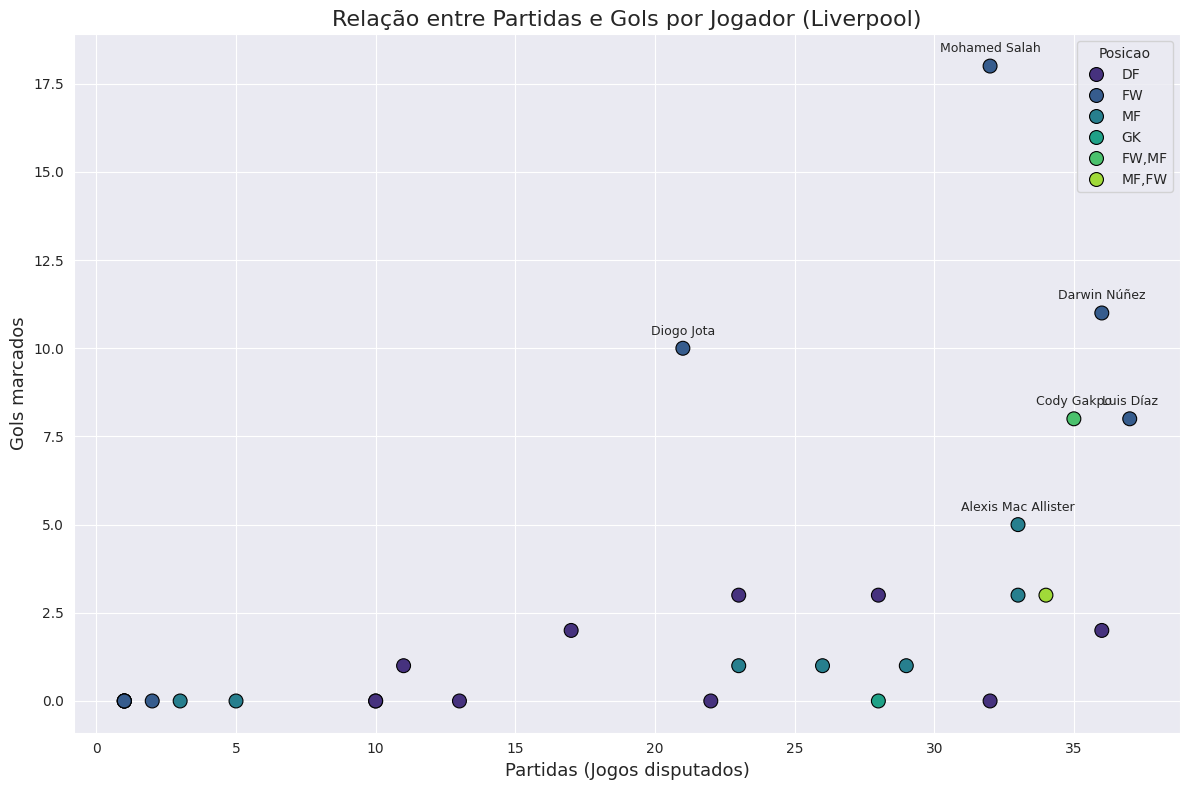

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.set_style("darkgrid")

# Scatter plot com Seaborn
sns.scatterplot(
    data=df_reduzido,
    x="Partidas", y="Gols",hue="Posicao",
    s=100, color='blue', edgecolor='k', palette='viridis'
)

# Nomes dos jogadores usando o iterrows() para iterar sobre cada linha
# Coloquei apenas quem marcou 5 gols ou mais
for i, row in df_reduzido.iterrows():
    if row["Gols"] >= 5:
        plt.text(row["Partidas"], row["Gols"]+0.3,
                 row["Nome"], fontsize=9, ha='center',
                 va='bottom')



plt.title("Relação entre Partidas e Gols por Jogador (Liverpool)", fontsize=16)
plt.xlabel("Partidas (Jogos disputados)", fontsize=13)
plt.ylabel("Gols marcados", fontsize=13)
plt.tight_layout()
plt.show()

## Extra: Distribuição de Gols por Posição

Foi aqui que notei um problema com a questão das posições, pois ao analisar a coluna, nota-se que há dois modelos para uma mesma posição.

Por mais que possa ser em ordem de dominância, isso acaba gerando uma confusão quando analisamos uma média de gols por posição, por exemplo.

In [34]:
print(df_reduzido.groupby("Posicao")["Gols"].sum().sort_values(ascending=False))

Posicao
FW       47.0
DF       11.0
MF       11.0
FW,MF     8.0
MF,FW     3.0
GK        0.0
Name: Gols, dtype: float64


In [35]:
print(df_reduzido.groupby("Posicao")["Gols"].mean().sort_values(ascending=False))

Posicao
FW,MF    8.000000
FW       6.714286
MF,FW    3.000000
MF       1.222222
DF       1.100000
GK       0.000000
Name: Gols, dtype: float64


## Criando DF Somente de FW e MF

Aprendi sobre a utilização do | ao invés do OR.



In [36]:
df_fw_mf = df_reduzido.loc[(df_reduzido["Posicao"] == "FW") | (df_reduzido["Posicao"] == "FW,MF") | (df_reduzido["Posicao"] == "MF,FW")]
print(df_fw_mf.sort_values(by="Gols", ascending=False).head(10))

              Nome Nacionalidade Posicao  Gols  Partidas  Titular  Minutos
3    Mohamed Salah        eg EGY      FW  18.0        32       28   2534.0
7     Darwin Núñez        uy URU      FW  11.0        36       22   2047.0
14      Diogo Jota        pt POR      FW  10.0        21       14   1145.0
1        Luis Díaz        co COL      FW   8.0        37       32   2629.0
11      Cody Gakpo        nl NED   FW,MF   8.0        35       17   1649.0
17  Harvey Elliott       eng ENG   MF,FW   3.0        34       11   1352.0
24        Ben Doak       sct SCO      FW   0.0         1        0     14.0
25    Jayden Danns       eng ENG      FW   0.0         2        0      9.0
29    Kaide Gordon       eng ENG      FW   0.0         1        0      1.0


In [37]:
df_fw_mf['Média de Gols'] = df_fw_mf['Gols'] / df_fw_mf['Partidas']

<ipython-input-37-9b03c6f94ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fw_mf['Média de Gols'] = df_fw_mf['Gols'] / df_fw_mf['Partidas']


In [43]:
df_fw_mf.sort_values(by='Média de Gols', ascending=False)

,Nome,Nacionalidade,Posicao,Gols,Partidas,Titular,Minutos,Média de Gols
3,Mohamed Salah,eg EGY,FW,18.0,32,28,2534.0,0.562500
14,Diogo Jota,pt POR,FW,10.0,21,14,1145.0,0.476190
7,Darwin Núñez,uy URU,FW,11.0,36,22,2047.0,0.305556
11,Cody Gakpo,nl NED,"FW,MF",8.0,35,17,1649.0,0.228571
1,Luis Díaz,co COL,FW,8.0,37,32,2629.0,0.216216
17,Harvey Elliott,eng ENG,"MF,FW",3.0,34,11,1352.0,0.088235
24,Ben Doak,sct SCO,FW,0.0,1,0,14.0,0.000000
25,Jayden Danns,eng ENG,FW,0.0,2,0,9.0,0.000000
29,Kaide Gordon,eng ENG,FW,0.0,1,0,1.0,0.000000


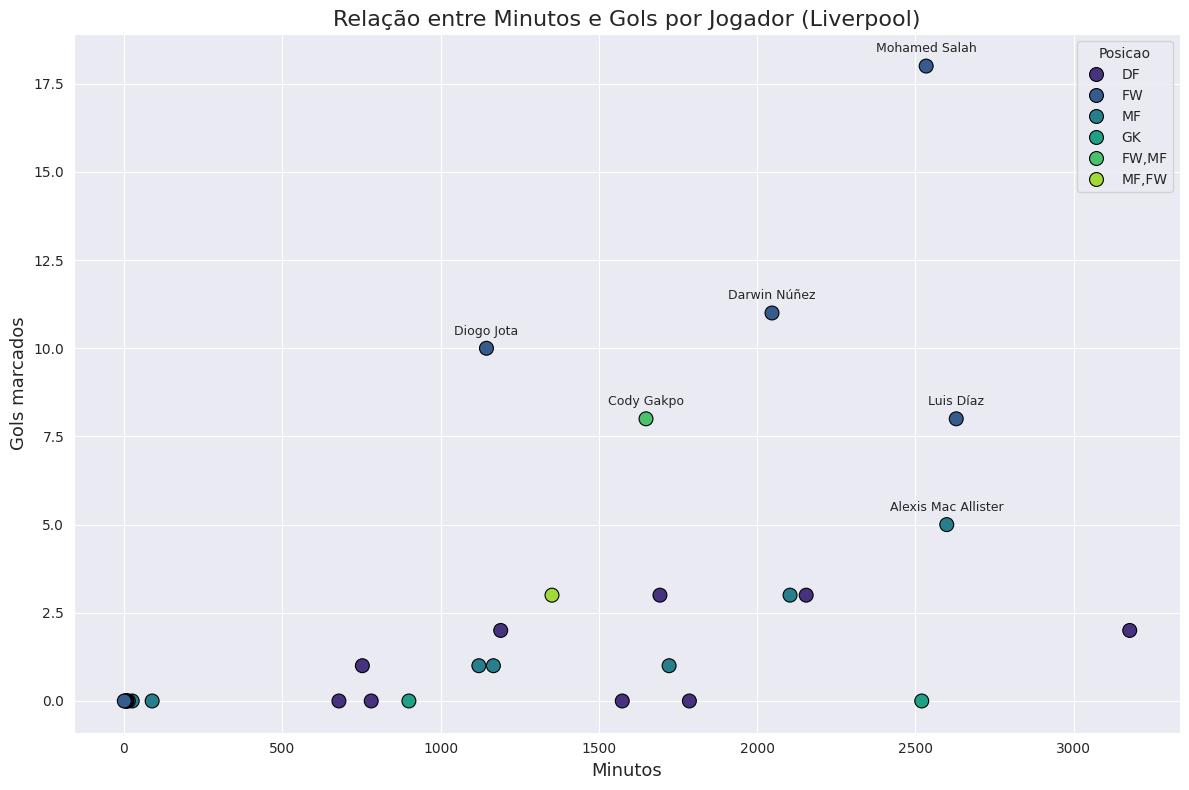

In [44]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")

# Scatter plot com Seaborn
sns.scatterplot(
    data=df_reduzido,
    x="Minutos", y="Gols",hue="Posicao",
    s=100, color='blue', edgecolor='k', palette='viridis'
)

# Nomes dos jogadores usando o iterrows() para iterar sobre cada linha
# Coloquei apenas quem marcou 5 gols ou mais
for i, row in df_reduzido.iterrows():
    if row["Gols"] >= 5:
        plt.text(row["Minutos"], row["Gols"]+0.3,
                 row["Nome"], fontsize=9, ha='center',
                 va='bottom')



plt.title("Relação entre Minutos e Gols por Jogador (Liverpool)", fontsize=16)
plt.xlabel("Minutos", fontsize=13)
plt.ylabel("Gols marcados", fontsize=13)
plt.tight_layout()
plt.show()

##Concluindo

Esta foi uma análise focada nos jogadores de frente do Liverpool FC.

Um projeto utilizando webscraping, tratamento e visualização de dados, com criação de novas colunas para enriquecer a análise.

Meu destaque fica para Diogo Jota, que costuma entrar na mesma posição que Darwin Nuñez. Jota mostra-se consideravelmente mais efetivo na relação gols/partidas, algo que fica mais gritante ainda quando analisamos algo mais afundo: a quantidade de minutos em campo, já que um jogador pode entrar por poucos minutos em um jogo e ainda assim contar como uma partida.